In [ ]:
import numpy as np
import pandas as pd\

import os
for dirname, _, filenames in os.walk('/users/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [102]:
dataset = pd.read_csv("/users/input/advtlr/Advertising.csv")
print(dataset.shape)
print(dataset.head(5))

(200, 5)
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [101]:
X= dataset.iloc[:,1:4]
y=dataset.iloc[:,4]
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape

(160, 3)

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
regressor = LinearRegression()

nof= X_train.shape[1]
print(nof)
mse=np.empty(2**nof-1)
ind=np.empty(nof)
l=list()
bl=list()
bitem=list()
k=0

from itertools import combinations
remaining = set(X_train.columns)
for j in range(1,len(remaining)+1):
    comb = combinations(remaining, j)
    tempbest=5000
   
    for i in list(comb): 
        lsti=list(i)
        print(list(i))
        l.append(lsti)
        regressor.fit(X_train.loc[:,lsti], y_train)
        y_exp=regressor.predict(X_train.loc[:,list(i)])
        mse[k] = mean_squared_error(y_train,y_exp)*y_train.shape[0]/(y_train.shape[0]-len(list(i)))
        if mse[k]<tempbest:
            bitem = lsti
            tempbest=mse[k]
        k = k + 1
        
    bl.append(bitem)

mse

3
['Newspaper']
['Radio']
['TV']
['Newspaper', 'Radio']
['Newspaper', 'TV']
['Radio', 'TV']
['Newspaper', 'Radio', 'TV']


array([24.28958108, 16.70084721, 10.6840135 , 16.69809361,  9.9949275 ,
        2.44045482,  2.45280485])

In [104]:
tmse=np.empty(len(bl))
k1=0
bfs=list()
tempbest=5000
for m in bl:
      regressor.fit(X_train.loc[:,m], y_train)
      y_exp=regressor.predict(X_test.loc[:,m])
      tmse[k1] = mean_squared_error(y_test,y_exp)*y_test.shape[0]/(y_test.shape[0]-len(list(i)))
      if tmse[k1]<tempbest:
            bfs = m
            tempbest=tmse[k1]
      k1 = k1 + 1
print(bfs)

['Radio', 'TV']


In [ ]:
tmse

# 

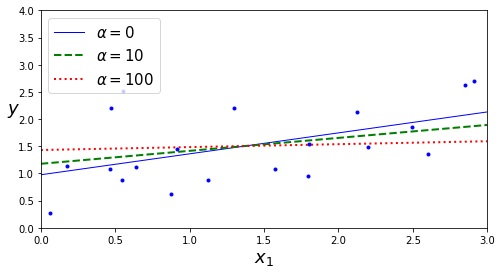

In [105]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
#plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
#plt.subplot(122)
#plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

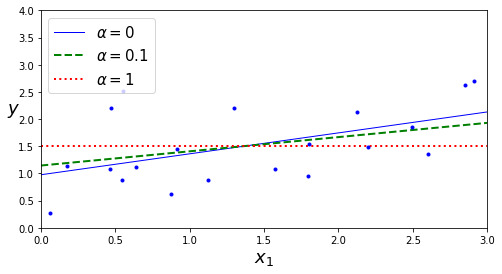

In [106]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
#plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
#plt.subplot(122)
#plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.show()

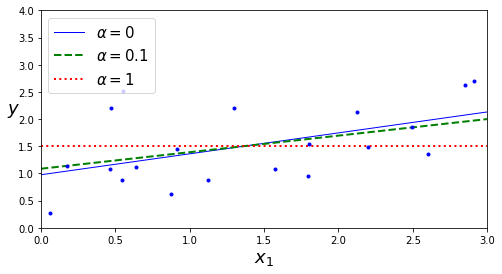

In [107]:
from sklearn.linear_model import ElasticNet
#elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
plt.figure(figsize=(8,4))
#plt.subplot(121)
plot_model(ElasticNet, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
#plt.subplot(122)
#plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.show()

In [113]:
auto=pd.read_csv('/Users/input/autompg-dataset/auto-mpg.csv')
auto.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [124]:
X=auto.iloc[:,[1,2,4,5,6,7]]

In [125]:
X.shape
#X.dropna(inplace=True)
#X.fillna(X.mean(),inplace=True)
y=auto.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X.describe()

,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000
